<div style="text-align: center; font-size: 25px;">
    <span>
        <strong>[010412204101] - Khai thác dữ liệu</strong>
    </span><br>
    <span>
        <strong>Nguyễn Quốc Huy - 22H1120071 - CN22CLCC</strong>
    </span><br>
    <p>
        <strong>Bài tập 2.3</strong>
    </p>
</div>

<p style="font-size: 20px;">
        <strong>Thử điều chỉnh các tham số của cây quyết định và chọn tham số cho kết quả là giá trị f-score tốt nhất.</strong>

In [1]:
# Cài đặt thư viện 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Nạp dữ liệu Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Hiển thị số thuộc tính và số objects
print(f"Dimensionality (số thuộc tính): {iris.data.shape[1]}")
print(f"Số objects (size): {df.shape[0]}")

# Đặt nhãn và hiển thị số lớp
X = df[iris.feature_names]
Y = df['target']
print("Số lớp (classes):", len(np.unique(Y)))

# Tách dữ liệu thành training data (70%) và test data (30%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, train_size=0.7, test_size=0.3)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Dimensionality (số thuộc tính): 4
Số objects (size): 150
Số lớp (classes): 3


In [3]:
# Tạo và huấn luyện mô hình, điều chỉnh tham số để tìm f-score tốt nhất
best_f1 = 0
best_params = {}

for max_depth in range(1, 6):
    for min_samples_split in range(2, 5):
        clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)
        clf.fit(X_train, Y_train)
        Y_predict = clf.predict(X_test)
        f1 = f1_score(Y_test, Y_predict, average='macro')
        if f1 > best_f1:
            best_f1 = f1
            best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split}

print("\nBest parameters:", best_params)
print("Best F1-score:", best_f1)

# Huấn luyện mô hình với tham số tốt nhất
clf = DecisionTreeClassifier(**best_params, random_state=42)
clf.fit(X_train, Y_train)


Best parameters: {'max_depth': 3, 'min_samples_split': 2}
Best F1-score: 1.0


DecisionTreeClassifier(max_depth=3, random_state=42)

In [4]:
# Test và đánh giá mô hình
Y_predict = clf.predict(X_test)
conf_matrix = confusion_matrix(Y_test, Y_predict)
accuracy = accuracy_score(Y_test, Y_predict)
f1 = f1_score(Y_test, Y_predict, average=None)

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("F1-score (per class):", f1)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Accuracy: 1.0
F1-score (per class): [1. 1. 1.]



Decision Tree Rules:

|--- petal length (cm) <= -0.83
|   |--- class: 0
|--- petal length (cm) >  -0.83
|   |--- petal length (cm) <= 0.51
|   |   |--- petal width (cm) <= 0.49
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.49
|   |   |   |--- class: 2
|   |--- petal length (cm) >  0.51
|   |   |--- petal width (cm) <= 0.69
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  0.69
|   |   |   |--- class: 2



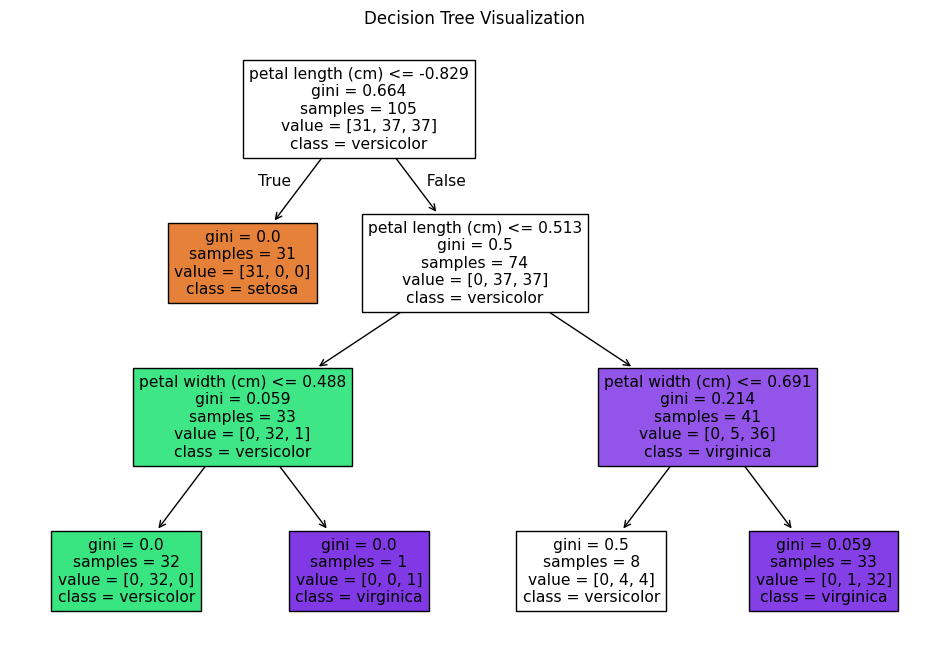

In [5]:
# Trực quan hóa cây quyết định
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
# Display decision tree text representation
print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(iris.feature_names)))
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()